In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from pathlib import Path
import json
import tensorflow as tf
from tensorflow import keras
from gaussian_blur import apply_gaussian_blur
from utils import TrainUtils

print(tf.__version__)





2.19.0


In [2]:
img_height=64
img_width=64
batch_size=32


In [3]:
loaded_model = tf.keras.models.load_model("model_icondata_blur_gray_64.keras")

2025-06-16 02:51:17.372060: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-06-16 02:51:17.372089: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2025-06-16 02:51:17.372096: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
I0000 00:00:1750013477.372113 13713673 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1750013477.372140 13713673 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
index_to_label = TrainUtils().load_label_mapping()
print(index_to_label)

加载标签映射: label_mapping.json
{0: 'add', 1: 'airplane', 2: 'alarm', 3: 'arrow_down', 4: 'arrow_left', 5: 'arrow_right', 6: 'arrow_up', 7: 'attach', 8: 'bag', 9: 'barcode', 10: 'battery', 11: 'bluetooth', 12: 'bookmark', 13: 'brightness', 14: 'calculator', 15: 'calendar', 16: 'call', 17: 'camera', 18: 'car', 19: 'cart', 20: 'chart', 21: 'check_mark', 22: 'clock', 23: 'close', 24: 'cloud', 25: 'computer', 26: 'contrast', 27: 'credit_card', 28: 'crop', 29: 'cursor', 30: 'cut', 31: 'dashboard', 32: 'delete', 33: 'dollar', 34: 'download', 35: 'edit', 36: 'external_link', 37: 'eye', 38: 'fab', 39: 'fast_forward', 40: 'favorite', 41: 'file', 42: 'filter', 43: 'fingerprint', 44: 'fire', 45: 'flag', 46: 'flashlight', 47: 'folder', 48: 'gift', 49: 'globe', 50: 'grid', 51: 'headphones', 52: 'home', 53: 'inbox', 54: 'info', 55: 'laptop', 56: 'light_bulb', 57: 'link', 58: 'location', 59: 'lock', 60: 'mail', 61: 'map', 62: 'maximize', 63: 'megaphone', 64: 'menu', 65: 'microphone', 66: 'minimize', 67: '

['/Users/sam/dataset/material_icon/close/FxRN9r_24px.png', '/Users/sam/dataset/material_icon/close/HKynY5_24px.png', '/Users/sam/dataset/material_icon/close/0OuAXD_24px.png', '/Users/sam/dataset/material_icon/close/KaLI1o_24px.png', '/Users/sam/dataset/material_icon/close/t8sasG_24px.png', '/Users/sam/dataset/material_icon/close/1ObFDi_24px.png', '/Users/sam/dataset/material_icon/close/H6WgcA_24px.png', '/Users/sam/dataset/material_icon/close/PoKM1y_24px.png', '/Users/sam/dataset/material_icon/close/MXLv2k_24px.png', '/Users/sam/dataset/material_icon/close/JmnIxd_24px.png']
TensorSpec(shape=(None, 64, 64), dtype=tf.float32, name=None)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


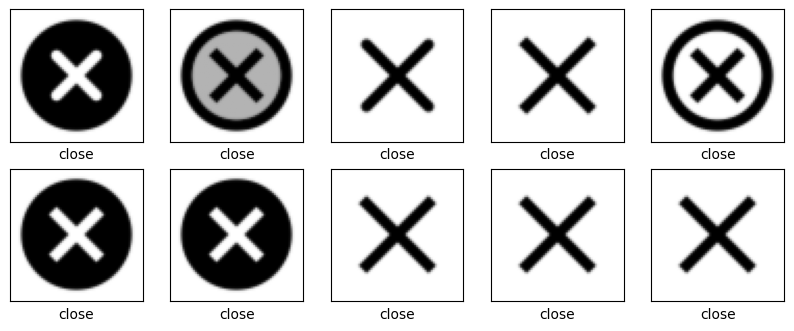

In [10]:
test_dir = "/Users/sam/dataset/material_icon/file"
#test_dir = "test"
#测试数据
test_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith('.png')]
print(test_paths)
img_util = TrainUtils()



def load_and_preprocess_test_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=4)
    image = img_util.rgba_to_rgb(image)
    image = tf.image.resize(image, [img_height, img_width])
    image = tf.image.rgb_to_grayscale(image) 

    #归一化
    image = tf.image.convert_image_dtype(image, tf.float32)
    #高斯模糊 
    image = apply_gaussian_blur(image, kernel_size=3, sigma=1)
   
    image = tf.squeeze(image)
    return image



test_path_ds = tf.data.Dataset.from_tensor_slices(test_paths)
test_image_ds = test_path_ds.map(load_and_preprocess_test_image)
test_image_ds = test_image_ds.batch(32)

print(test_image_ds.element_spec)



predictions = loaded_model.predict(test_image_ds)

plt.figure(figsize=(10,10))
cnt = len(test_paths) if len(test_paths) < 25 else 25
for i in range(cnt):
    image = tf.io.read_file(test_paths[i])
    image = tf.image.decode_png(image, channels=4)
    image = img_util.rgba_to_rgb(image)
    #print(image.shape, tf.reduce_max(image), tf.reduce_min(image))
    image = tf.image.resize(image, [img_height, img_width])
 
    image = tf.image.rgb_to_grayscale(image) 
    #归一化
    image = tf.image.convert_image_dtype(image, tf.float32)
    #高斯模糊 
    image = apply_gaussian_blur(image, kernel_size=3, sigma=0.5)
    #二值化
    #max_ = tf.reduce_max(image)
    #min_ = tf.reduce_min(image)
    #threshold = (max_ + min_) / 2;

    #image = tf.where(image > threshold, 1, 0)
    image = tf.squeeze(image)
  
  
    predicted_label = np.argmax(predictions[i])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap="gray")
    label=index_to_label[predicted_label]
    plt.xlabel(label)
plt.show()

In [48]:
img_util = TrainUtils()
test_ds = tf.keras.utils.image_dataset_from_directory(
  '/Users/sam/dataset/material_icon',
  seed=123,
  color_mode="rgba",
  image_size=(img_height, img_width), batch_size=batch_size)



def process(image, label):
  image = img_util.rgba_to_rgb(image)
  image = tf.image.resize(image, [img_height, img_width])
  image = tf.image.rgb_to_grayscale(image) 

  #归一化
  image = tf.image.convert_image_dtype(image, tf.float32)
  #高斯模糊 
  image = apply_gaussian_blur(image, kernel_size=3, sigma=1)
  return image

test_ds = test_ds.map(process)
print(test_ds.element_spec)

Found 501 files belonging to 41 classes.
TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None)


In [82]:
predictions = loaded_model.predict(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


加载标签映射: label_mapping.json
0 5 arrow_right 0.9732038
1 78 refresh 0.99740857
2 40 favorite 0.97766554
3 82 search 0.60641223
4 47 folder 0.99499327
5 47 folder 0.9988167
6 47 folder 0.8960101
7 5 arrow_right 0.98057175
8 66 minimize 0.99227226
9 40 favorite 0.9903385
10 6 arrow_up 0.6135903
11 40 favorite 0.97766554
12 47 folder 0.9850808
13 45 flag 0.7820419
14 78 refresh 0.613983
15 18 car 0.6404177
16 82 search 0.60628
17 47 folder 0.9834606
18 34 download 0.79948527
19 18 car 0.54620475
20 24 cloud 0.99826056
21 3 arrow_down 0.9392263
22 55 laptop 0.6321386
23 24 cloud 0.99955624
24 95 upload 0.4802495
25 17 camera 0.81774783
26 3 arrow_down 0.9075758
27 18 car 0.8067701
28 15 calendar 0.97349304
29 78 refresh 0.3937354
30 24 cloud 0.6616083
31 78 refresh 0.613983


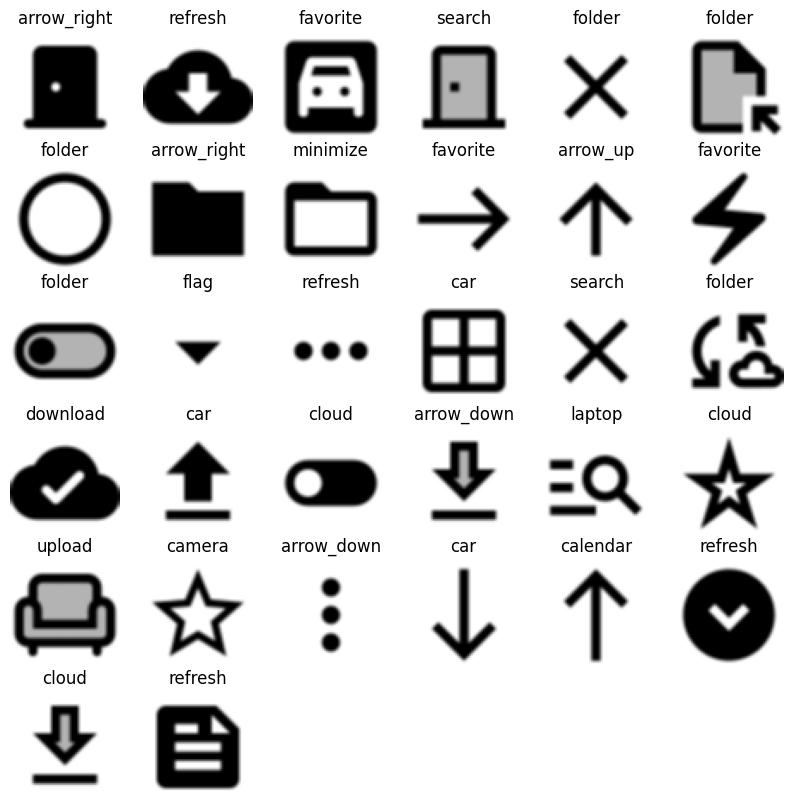

In [87]:
label_to_index = img_util.load_label_mapping([])
images =  list(test_ds.as_numpy_iterator())
plt.figure(figsize=(10, 10))
batch = images[0]
for i in range(32):
    img = batch[i]
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img, cmap='gray')
    predicted_label = np.argmax(predictions[i])
    label=label_to_index[predicted_label]
    print(i,  predicted_label, label, predictions[i][predicted_label])
    plt.title(label)
    #plt.title(predicted_label)
    plt.axis("off")
    if i*batch_size+j == 24:
        break
plt.show() 

